# Лабораторная работа 6

### Импорт зависимостей

In [1]:
import torch
import pykeen
import matplotlib.pyplot as plt
from pykeen.pipeline import pipeline
from pykeen.predict import predict_target
from pykeen.evaluation import ClassificationEvaluator

### Создание датасета

In [2]:
from pykeen.datasets import PharmKG8k

In [3]:
dataset = PharmKG8k()

### Инициализация метрик

In [4]:
roc_auc_score = {"ComplEx": [], "HolE": []}
precision = {"ComplEx": [], "HolE": []}
accuracy = {"ComplEx": [], "HolE": []}
f1 = {"ComplEx": [], "HolE": []}

pipeline_results_list = {"ComplEx": [], "HolE": []}

In [5]:
evaluator = ClassificationEvaluator()

### Обучение модели

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [8]:
# Список значений количества эпох
epochs = [1,20,50,100]
for model_name in pipeline_results_list.keys():
    for epoch in epochs:
    
      # Обучаем модель
      pipeline_results = pipeline(
          model=model_name,
          dataset=dataset,
          training_kwargs=dict(num_epochs=epoch),
          device=device
      )
    
      # Сохраняем обученную модель
      pipeline_results_list[model_name].append(pipeline_results)
    
      model = pipeline_results.model
      # Рассчитываем метрики для обученной модели и датасета Nations
      metrics = evaluator.evaluate(model, dataset.testing.mapped_triples,
                                 additional_filter_triples=[dataset.training.mapped_triples,
                                                            dataset.validation.mapped_triples])
    
      # Сохраняем рассчитанные метрики
      roc_auc_score[model_name].append(metrics.get_metric('roc_auc_score'))
      precision[model_name].append(metrics.get_metric('average_precision_score'))
      accuracy[model_name].append(metrics.get_metric('accuracy_score'))
      f1[model_name].append(metrics.get_metric('f1_score'))

No random seed is specified. Setting to 3677754741.
You're trying to map triples with 7 entities and 0 relations that are not in the training set. These triples will be excluded from the mapping.
In total 7 from 50036 triples were filtered out
You're trying to map triples with 12 entities and 0 relations that are not in the training set. These triples will be excluded from the mapping.
In total 12 from 49536 triples were filtered out


Training epochs on cuda:0:   0%|          | 0/1 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=1024.


Evaluating on cuda:0:   0%|          | 0.00/49.8k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 146.25s seconds
INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=1024.


Evaluating on cuda:0:   0%|          | 0.00/49.8k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 1024.31s seconds
INFO:pykeen.pipeline.api:Using device: cuda


Training epochs on cuda:0:   0%|          | 0/20 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=1024.


Evaluating on cuda:0:   0%|          | 0.00/49.8k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 145.35s seconds
INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=1024.


Evaluating on cuda:0:   0%|          | 0.00/49.8k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 1008.25s seconds
INFO:pykeen.pipeline.api:Using device: cuda


Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=1024.


Evaluating on cuda:0:   0%|          | 0.00/49.8k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 147.91s seconds
INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
C:\Users\goras\miniconda3\envs\AI_testing\Lib\site-packages\rexmex\metrics\classification.py:484: RuntimeWarning: invalid value encountered in power
  pthr = (fpr**0.5) / (fpr**0.5 + tpr**0.5)
C:\Users\goras\miniconda3\envs\AI_testing\Lib\site-packages\rexmex\metrics\classification.py:484: RuntimeWarning: invalid value encountered in power
  pthr = (fpr**0.5) / (fpr**0.5 + tpr**0.5)
C:\Users\goras\miniconda3\envs\AI_testing\Lib\site-packages\rexmex\metrics\classification.py:547: RuntimeWarning: invalid value encountered in power
  fm = (ppv * tpr) ** 0.5
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=1024.


Evaluating on cuda:0:   0%|          | 0.00/49.8k [00:00<?, ?triple/s]

C:\Users\goras\miniconda3\envs\AI_testing\Lib\site-packages\rexmex\metrics\classification.py:484: RuntimeWarning: invalid value encountered in power
  pthr = (fpr**0.5) / (fpr**0.5 + tpr**0.5)
C:\Users\goras\miniconda3\envs\AI_testing\Lib\site-packages\rexmex\metrics\classification.py:547: RuntimeWarning: invalid value encountered in power
  fm = (ppv * tpr) ** 0.5
INFO:pykeen.evaluation.evaluator:Evaluation took 1007.04s seconds
INFO:pykeen.pipeline.api:Using device: cuda


Training epochs on cuda:0:   0%|          | 0/100 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=1024.


Evaluating on cuda:0:   0%|          | 0.00/49.8k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 144.89s seconds
INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=1024.


Evaluating on cuda:0:   0%|          | 0.00/49.8k [00:00<?, ?triple/s]

C:\Users\goras\miniconda3\envs\AI_testing\Lib\site-packages\rexmex\metrics\classification.py:484: RuntimeWarning: invalid value encountered in power
  pthr = (fpr**0.5) / (fpr**0.5 + tpr**0.5)
C:\Users\goras\miniconda3\envs\AI_testing\Lib\site-packages\rexmex\metrics\classification.py:547: RuntimeWarning: invalid value encountered in power
  fm = (ppv * tpr) ** 0.5
INFO:pykeen.evaluation.evaluator:Evaluation took 1006.10s seconds


### Отображение метрик

In [10]:
def draw_metrics(roc_auc_score, precision, accuracy, f1, name): 
    # В качесте лейблов используем список значений эпох
    labels = epochs
    
    # Plotting ROC AUC scores
    plt.plot(labels, roc_auc_score[name], label='ROC_AUC')
    
    # Plotting precision scores
    plt.plot(labels, precision[name], label='Precision')
    
    # Plotting accuracy scores
    plt.plot(labels, accuracy[name], label='Accuracy')
    
    # Plotting F1
    plt.plot(labels, f1[name], label='F1')
    
    # Добавляем легенду, лейблы и название
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Scores')
    plt.title('Model Evaluation Metrics for ' + name)
    
    # Отрисовываем график
    plt.show()

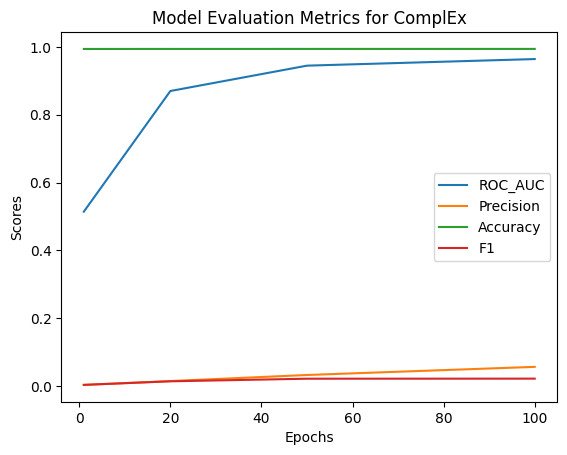

In [14]:
draw_metrics(roc_auc_score, precision, accuracy, f1, "ComplEx")

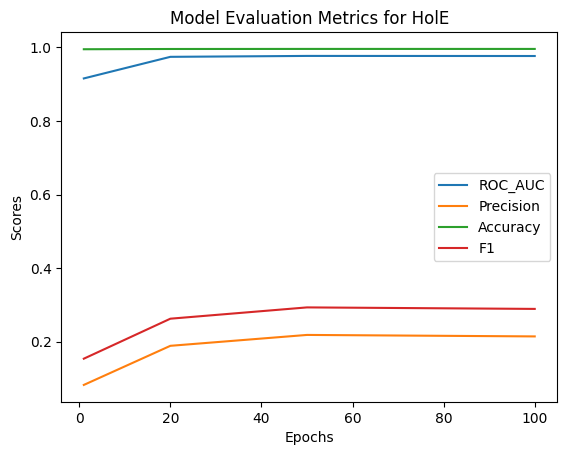

In [11]:
draw_metrics(roc_auc_score, precision, accuracy, f1, "HolE")

### Link Prediction

In [12]:
def print_prediction_results(name):
    print(f'Модель {name}')
    print('---------------------')
    for idx, ep in enumerate(epochs):
        pipeline_result = pipeline_results_list[name][idx]
    
        # Получаем доступное отношение и сущность
        available_relation = next(iter(dataset.relation_to_id))
        available_entity = next(iter(dataset.entity_to_id))
    
        # Используем predict_target с доступным отношением и сущностью
        pred = predict_target(
            model=pipeline_result.model,
            relation=available_relation,
            head=available_entity,
            triples_factory=pipeline_result.training,
        )
    
        pred_filtered = pred.filter_triples(dataset.training)
        pred_annotated = pred_filtered.add_membership_columns(validation=dataset.validation, testing=dataset.testing)
        pred_df = pred_annotated.df[['tail_label', 'score']]
        print(f'Результат при вычислении {ep} эпох для сущности "{available_entity}" и отношения "{available_relation}"')
        print(pred_df)
        print('__________________________')

In [38]:
print_prediction_results("ComplEx")

Модель ComplEx
---------------------
Результат при вычислении 1 эпох для сущности "22q11 deletion syndrome" и отношения "A"
                 tail_label       score
336       aminocaproic acid   92.337601
2862                gramd1b   89.906410
1568                   crot   87.957809
3084                  hmga1   87.447113
2935                   guk1   86.866150
...                     ...         ...
3434                   irf6  -90.334061
6496                sunburn  -91.529022
3359                  ilkap  -96.997040
5982                 sema3e  -99.206329
3760  leukoencephalopathies -106.877327

[7247 rows x 2 columns]
__________________________
Результат при вычислении 20 эпох для сущности "22q11 deletion syndrome" и отношения "A"
                 tail_label      score
6671                   thra  74.907051
3468                   itch  73.283241
585                atp6v1b1  71.316711
1048                  ccna2  70.288300
4717                  nuak2  68.869896
...                   

In [13]:
print_prediction_results("HolE")

Модель HolE
---------------------
Результат при вычислении 1 эпох для сущности "22q11 deletion syndrome" и отношения "A"
              tail_label     score
627            azatadine  1.170768
3008  heinz body anemias  1.051367
5941               scn3b  1.023861
1302             chrna10  1.015602
3063        histidinemia  1.015025
...                  ...       ...
1654               cxcr4 -1.266631
4317               mthfr -1.298134
772                 bmp4 -1.312051
6418              stat5a -1.316595
4366               myd88 -1.340228

[7247 rows x 2 columns]
__________________________
Результат при вычислении 20 эпох для сущности "22q11 deletion syndrome" и отношения "A"
        tail_label     score
6666  thioridazine  2.772221
5417  procainamide  2.749391
3464  isotretinoin  2.737897
4766   ondansetron  2.710158
5368    pregabalin  2.668569
...            ...       ...
1527         cox8a -2.316312
6150      slc25a13 -2.354303
687           bche -2.388589
249            alb -2.402752
